# Exploratory Spatial Data Analysis

Code is based on the work of Sergio Rey and Luc Anselin (https://esda.readthedocs.io/en/latest/#)

Citation:

PySAL: A Python Library of Spatial Analytical Methods, Rey, S.J. and L. Anselin, Review of Regional Studies 37, 5-27 2007.

## Preparing the library

In [4]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import esda

In [5]:
import pandas as pd
import geopandas as gpd
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the shapefile

In [6]:
df = gpd.read_file('LondonBoroughs.shp')

In [8]:
df.head()

,OBJECTID,label,altname,name,code,Shape_Leng,Shape_Area,Pop,Wheelchair,Walking_di,...,Whe_GiZSco,Whe_GiPVal,Whe_Gi_Bin,Wal_GiZSco,Wal_GiPVal,Wal_Gi_Bin,Oth_GiZSco,Oth_GiPVal,Oth_Gi_Bin,geometry
0,1,E09000020,None,Kensington and Chelsea,E09000020,20991.920623,1.238970e+07,168623.0,1888.0,7131.0,...,-0.872394,0.382993,0.0,-0.770796,0.440828,0.0,-0.718182,0.472645,0.0,"POLYGON ((523025.1189999999 182740.4240000006,..."
1,2,E09000013,None,Hammersmith and Fulham,E09000013,23886.232583,1.716103e+07,179424.0,1688.0,6367.0,...,-0.398675,0.690133,0.0,-0.319428,0.749402,0.0,-0.299865,0.764280,0.0,"POLYGON ((524308.7850000001 175686.75, 524300...."
2,3,E09000005,None,Brent,E09000005,38346.506735,4.323529e+07,278623.0,3169.0,11869.0,...,0.092537,0.926271,0.0,0.191780,0.847915,0.0,0.236030,0.813409,0.0,"POLYGON ((515775.3130000001 186050.3269999996,..."
3,4,E09000016,None,Havering,E09000016,63788.748445,1.144689e+08,231049.0,3246.0,11995.0,...,2.341300,0.019217,2.0,2.235520,0.025383,2.0,2.193770,0.028252,2.0,"POLYGON ((551543.0049999999 186762.2770000007,..."
4,5,E09000029,None,Sutton,E09000029,39761.598638,4.385036e+07,185441.0,2271.0,8464.0,...,1.054280,0.291756,0.0,1.072330,0.283572,0.0,1.072280,0.283596,0.0,"POLYGON ((523420.1279999996 166484.2339999992,..."


In [11]:
df['Whe_Pop']

0     1.119660
1     0.940788
2     1.137380
3     1.404900
4     1.224650
5     1.185040
6     1.193890
7     1.122080
8     1.236770
9     0.893513
10    1.073770
11    0.918950
12    0.825404
13    0.946557
14    1.083700
15    0.894183
16    1.169000
17    1.185800
18    0.818988
19    1.241840
20    0.904916
21    1.125410
22    1.380430
23    1.179710
24    1.341940
25    1.180330
26    1.117670
27    0.925529
28    1.109630
29    1.054230
30    1.130360
31    0.894161
32    0.881720
Name: Whe_Pop, dtype: float64

## Looking at the choropleth maps

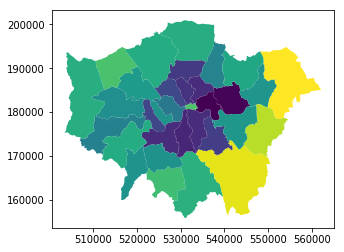

In [200]:
# Plotting a choropleth map for the ratio of population on wheelchair
df.plot(column='Whe_Pop')

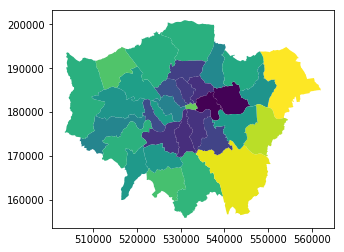

In [201]:
# Plotting a choropleth map for the ratio of population with walking difficulty
df.plot(column='Wal_Pop')

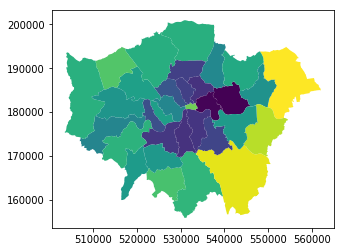

In [202]:
# Plotting a choropleth map for the ratio of population with other disabilities
df.plot(column='Oth_Pop')

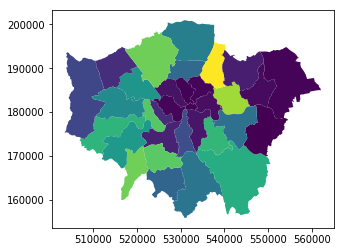

In [203]:
# Plotting a choropleth map for the ratio of total population with reduced mobility
df.plot(column='Dis_inc0_1')

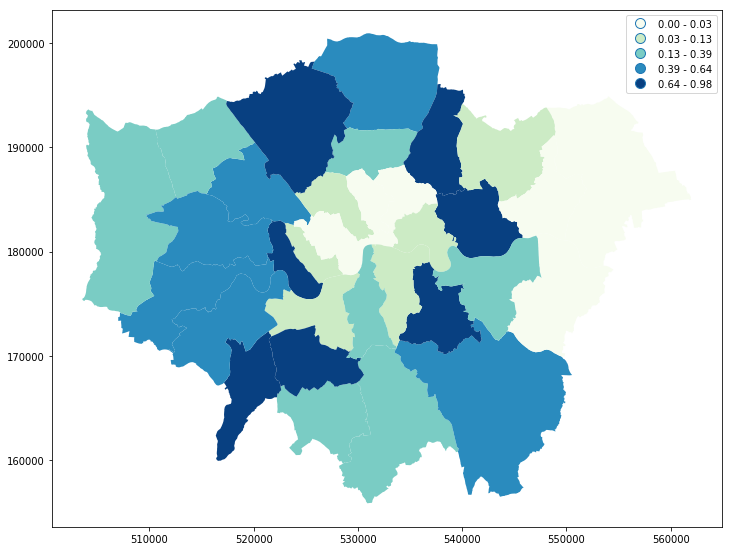

In [204]:
# Plotting a choropleth map for the ratio of total population with reduced mobility
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='Dis_inc0_1', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax)
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

## Setting the spatial weight

As the object of analysis is polygon where one borough shares boundaries with surrounding neighbours, the spatial relationship is conceptualised as the contiguity of edges and corners, or called the Queen weight. 

In [205]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

After setting the spatial weight, attribute similarity as the measurement of spatial similarity is calculated. This similarity index is called <b>spatial lag</b>.

## Global Autocorrelation: Moran's I

In [206]:
# Setting the value for each demographics filter
a = df['Whe_Pop']
b = df['Wal_Pop']
c = df['Oth_Pop']
d = df['Dis_inc0_1']

### Population on wheelchair

In [207]:
# Global Moran's I
mi_whe = esda.moran.Moran(a, wq)
mi_whe.I

0.21898470010283747

Text(0.5, 0, "Moran's I")

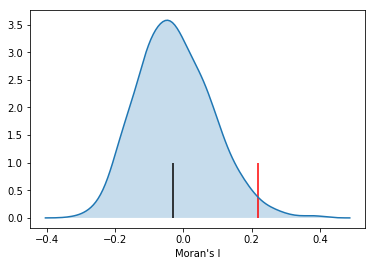

In [208]:
# Visualising Moran's I distribution
import seaborn as sbn
sbn.kdeplot(mi_whe.sim, shade=True)
plt.vlines(mi_whe.I, 0, 1, color='r')
plt.vlines(mi_whe.EI, 0,1)
plt.xlabel("Moran's I")

In [209]:
# Looking at the p-value
mi_whe.p_sim # Statistically significant

0.02

### Population with walking difficulties

In [210]:
# Global Moran's I
mi_wal = esda.moran.Moran(b, wq)
mi_wal.I

0.20367006559537615

Text(0.5, 0, "Moran's I")

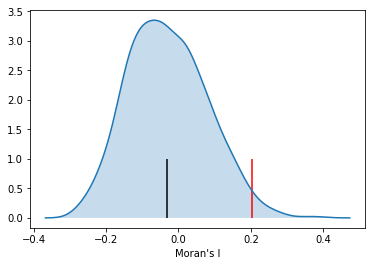

In [211]:
# Visualising Moran's I distribution
import seaborn as sbn
sbn.kdeplot(mi_wal.sim, shade=True)
plt.vlines(mi_wal.I, 0, 1, color='r')
plt.vlines(mi_wal.EI, 0,1)
plt.xlabel("Moran's I")

In [212]:
# Looking at the p-value
mi_wal.p_sim # Statistically significant

0.021

### Population with other disabilities

In [213]:
# Global Moran's I
mi_oth = esda.moran.Moran(c, wq)
mi_oth.I

0.19589481806989067

Text(0.5, 0, "Moran's I")

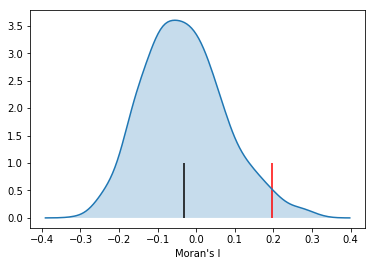

In [214]:
# Visualising Moran's I distribution
import seaborn as sbn
sbn.kdeplot(mi_oth.sim, shade=True)
plt.vlines(mi_oth.I, 0, 1, color='r')
plt.vlines(mi_oth.EI, 0,1)
plt.xlabel("Moran's I")

In [215]:
# Looking at the p-value
mi_oth.p_sim # Statistically significant

0.029

### Total population with reduced mobility

In [216]:
# Global Moran's I
mi_tot = esda.moran.Moran(d, wq)
mi_tot.I

0.13561765571478518

Text(0.5, 0, "Moran's I")

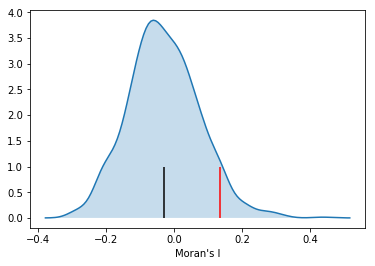

In [217]:
# Visualising Moran's I distribution
import seaborn as sbn
sbn.kdeplot(mi_tot.sim, shade=True)
plt.vlines(mi_tot.I, 0, 1, color='r')
plt.vlines(mi_tot.EI, 0,1)
plt.xlabel("Moran's I")

In [218]:
# Looking at the p-value
mi_tot.p_sim # Statistically insignificant

0.06

## Local Autocorrelation: Hot spots, cold spots, and spatial outliers

This analysis is done by firstly investigating Moran's I to see whether there is any autocorrelation or not. After that, hot spot analysis is performed to identify hot spots, cold spots, and spatial outliers.

### Population on wheelchair

In [219]:
# Setting the spatial lag
lag_whe = lps.weights.lag_spatial(wq, df['Whe_Pop'])

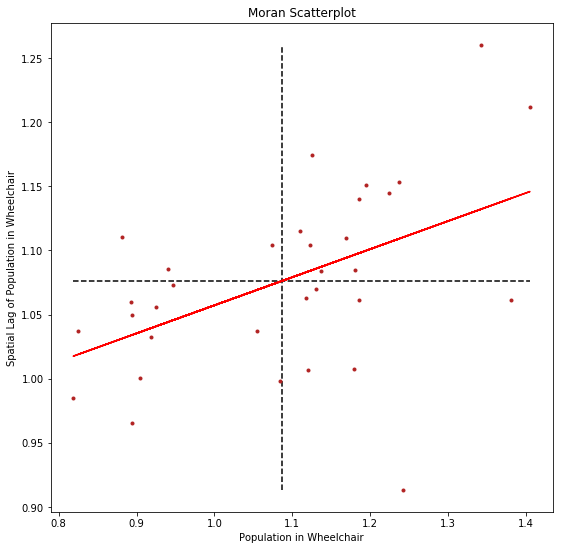

In [220]:
# Looking for Moran's I of population on wheelchair
wheelchair = df['Whe_Pop']
b, a = np.polyfit(wheelchair, lag_whe, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(wheelchair, lag_whe, '.', color='firebrick')

 # dashed vert at mean of the population of wheelchair
plt.vlines(wheelchair.mean(), lag_whe.min(), lag_whe.max(), linestyle='--')
 # dashed horizontal at mean of lagged population of wheelchair 
plt.hlines(lag_whe.mean(), wheelchair.min(), wheelchair.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(wheelchair, a + b*wheelchair, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Population in Wheelchair')
plt.xlabel('Population in Wheelchair')
plt.show()

In [222]:
# Calculating Moran's I
wheelchair_i = esda.moran.Moran_Local(wheelchair, wq)

In [223]:
wheelchair_i.q

array([4, 3, 4, 1, 1, 4, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 4, 3, 1,
       4, 4, 1, 4, 4, 3, 1, 3, 4, 3, 2])

In [224]:
# Looking for the number of boroughs having siginificant Moran's I
(wheelchair_i.p_sim < 0.1).sum() # for degree of confidence 90% = 6 boroughs
(wheelchair_i.p_sim < 0.05).sum() # for degree of confidence 95% = 5 boroughs
(wheelchair_i.p_sim < 0.01).sum() # for degree of confidence 99% = 3 boroughs

2

In [523]:
# Labelling the borough based on its position on Moran's I scatter plot
sig_whe = wheelchair_i.p_sim < 0.1
hotspot_whe = sig_whe * wheelchair_i.q==1
coldspot_whe = sig_whe * wheelchair_i.q==3
lowhigh_whe = sig_whe * wheelchair_i.q==2
highlow_whe = sig_whe * wheelchair_i.q==4

In [524]:
# Identifying hot spots
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot_whe*1]

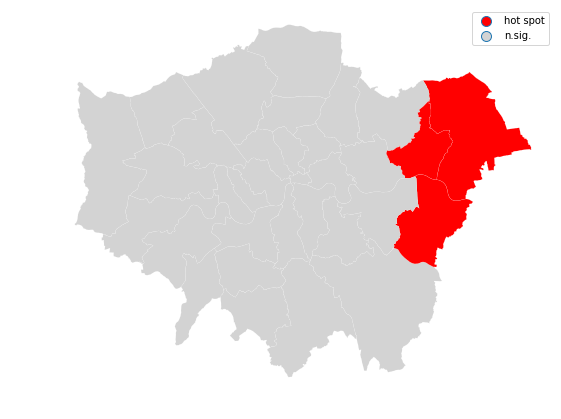

In [525]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [526]:
# Identifying cold spots
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot_whe*1]

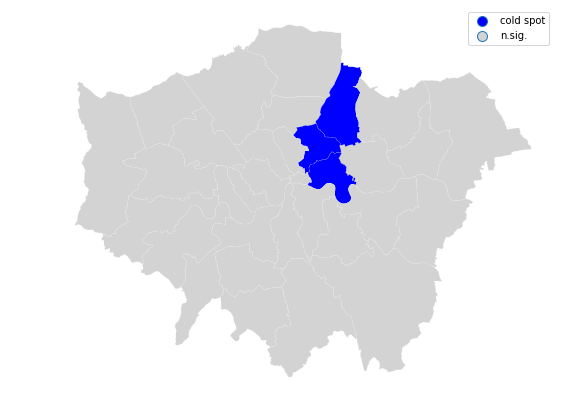

In [527]:
# Plotting the cold spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [455]:
# Identifying the low-high outliers
spots = ['n.sig.', 'lowhigh']
labels = [spots[i] for i in lowhigh_whe*1]

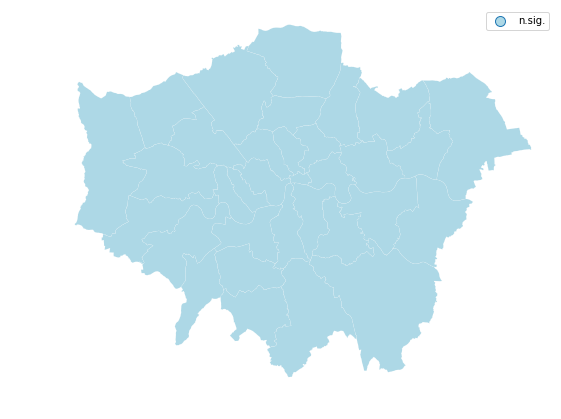

In [456]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [528]:
# Identifying high-low outliers
spots = ['n.sig.', 'highlow']
labels = [spots[i] for i in highlow_whe*1]

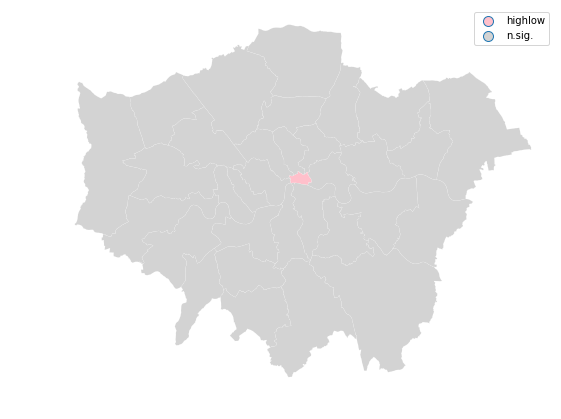

In [529]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [530]:
# Joining all together
sig_whe = 1 * (wheelchair_i.p_sim < 0.1)
hotspot_whe = 1 * (sig_whe * wheelchair_i.q==1)
coldspot_whe = 3 * (sig_whe * wheelchair_i.q==3)
lowhigh_whe = 2 * (sig_whe * wheelchair_i.q==2)
highlow_whe = 4 * (sig_whe * wheelchair_i.q==4)
spots_whe = hotspot_whe + coldspot_whe + lowhigh_whe + highlow_whe
spots_whe

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 4, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [531]:
spot_labels_whe = [ '0 Not significant', '1 Hot spot', '2 Low-high outlier', '3 Cold spot', '4 High-low outlier']
labels_whe = [spot_labels_whe[i] for i in spots_whe]

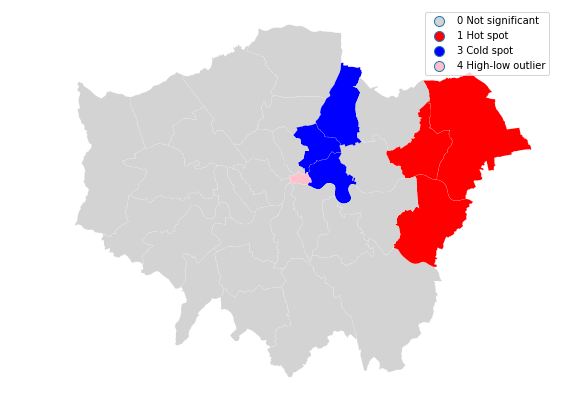

In [532]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_whe).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

### Population with walking difficulties

In [462]:
# Setting the spatial lag
lag_wal = lps.weights.lag_spatial(wq, df['Wal_Pop'])

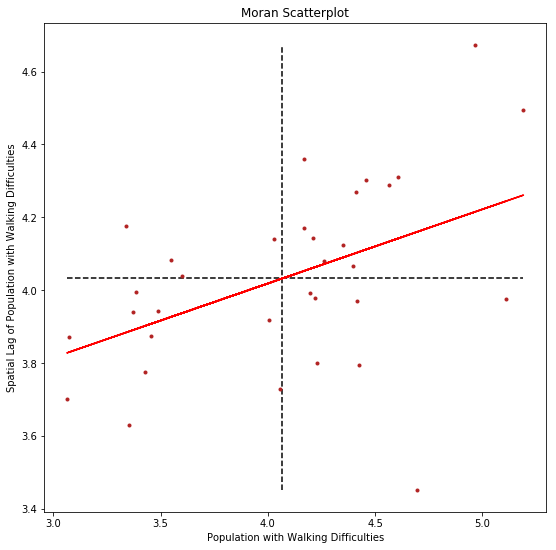

In [463]:
# Looking for Moran's I of population on wheelchair
walking = df['Wal_Pop']
b, a = np.polyfit(walking, lag_wal, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(walking, lag_wal, '.', color='firebrick')

 # dashed vert at mean of the population of wheelchair
plt.vlines(walking.mean(), lag_wal.min(), lag_wal.max(), linestyle='--')
 # dashed horizontal at mean of lagged population of wheelchair 
plt.hlines(lag_wal.mean(), walking.min(), walking.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(walking, a + b*walking, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Population with Walking Difficulties')
plt.xlabel('Population with Walking Difficulties')
plt.show()

In [464]:
# Calculating Moran's I
walking_i = esda.moran.Moran_Local(walking, wq)

In [465]:
walking_i.q

array([4, 2, 1, 1, 1, 4, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 4, 3, 1,
       4, 4, 1, 4, 4, 3, 1, 3, 4, 3, 2])

In [466]:
# Looking for the number of boroughs having siginificant Moran's I
(walking_i.p_sim < 0.1).sum() # for degree of confidence 90% = 6 boroughs
(walking_i.p_sim < 0.05).sum() # for degree of confidence 95% = 4 boroughs
(walking_i.p_sim < 0.01).sum() # for degree of confidence 99% = 2 boroughs

2

In [533]:
# Labelling the borough based on its position on Moran's I scatter plot
sig_wal = walking_i.p_sim < 0.1
hotspot_wal = sig_wal * walking_i.q==1
coldspot_wal = sig_wal * walking_i.q==3
lowhigh_wal = sig_wal * walking_i.q==2
highlow_wal = sig_wal * walking_i.q==4

In [534]:
# Identifying hot spots
spots_wal1 = ['n.sig.', 'hot spot']
labels_wal1 = [spots_wal1[i] for i in hotspot_wal*1]

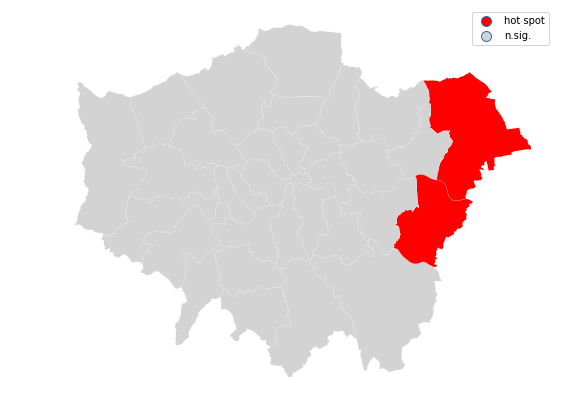

In [535]:
# Plotting the hot spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_wal1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [536]:
# Identifying cold spots
spots_wal2 = ['n.sig.', 'cold spot']
labels_wal2 = [spots_wal2[i] for i in coldspot_wal*1]

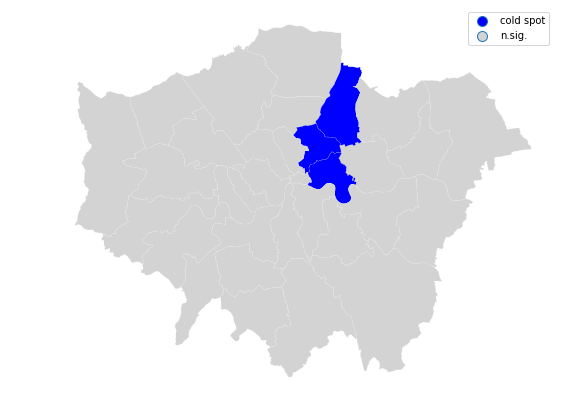

In [537]:
# Plotting the cold spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_wal2).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [538]:
# Identifying the low-high outliers
spots_wal3 = ['n.sig.', 'lowhigh']
labels_wal3 = [spots_wal3[i] for i in lowhigh_wal*1]

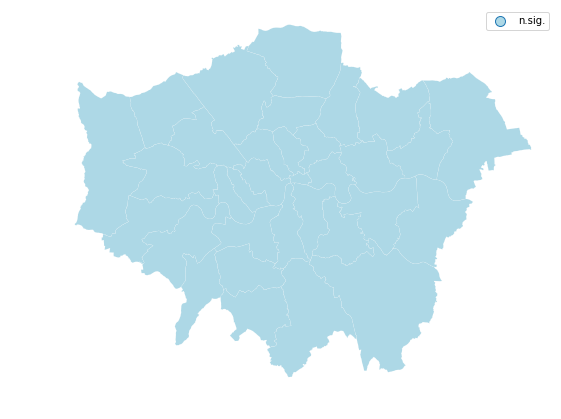

In [539]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_wal3).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [540]:
# Identifying high-low outliers
spots_wal4 = ['n.sig.', 'highlow']
labels_wal4 = [spots_wal4[i] for i in highlow_wal*1]

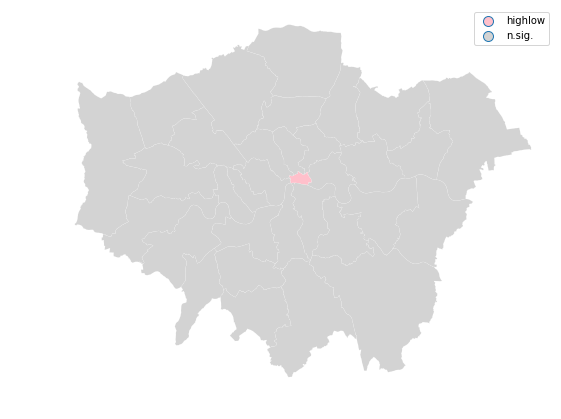

In [541]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_wal4).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [542]:
# Joining all together
sig_wal = 1 * (walking_i.p_sim < 0.1)
hotspot_wal = 1 * (sig_wal * walking_i.q==1)
coldspot_wal = 3 * (sig_wal * walking_i.q==3)
lowhigh_wal = 2 * (sig_wal * walking_i.q==2)
highlow_wal = 4 * (sig_wal * walking_i.q==4)
spots_wal_1 = hotspot_wal + coldspot_wal + lowhigh_wal + highlow_wal
spots_wal_1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 4, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [543]:
spot_labels_wal2 = [ '0 Not significant', '1 Hot spot', '2 Low-high outlier', '3 Cold spot', '4 High-low outlier']
labels_1 = [spot_labels_wal2[i] for i in spots_wal_1]

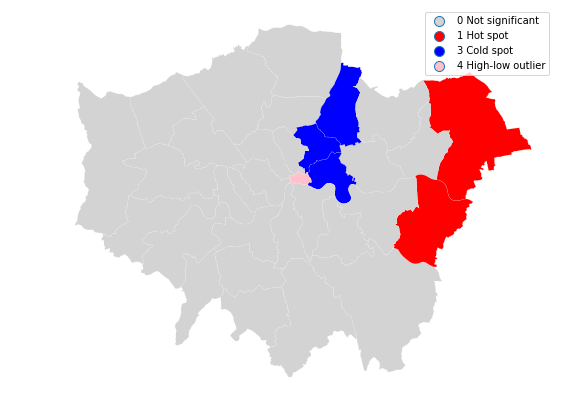

In [544]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

### Population with other disabilities

In [597]:
# Setting the spatial lag
lag_oth = lps.weights.lag_spatial(wq, c)

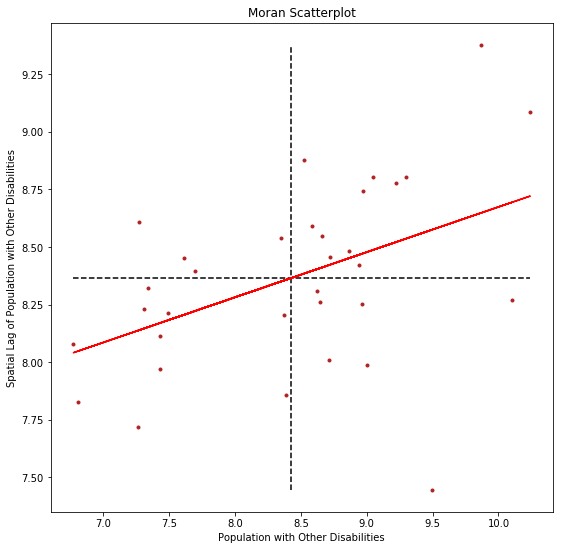

In [598]:
# Looking for Moran's I of population on wheelchair
other = df['Oth_Pop']
b, a = np.polyfit(other, lag_oth, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(other, lag_oth, '.', color='firebrick')

 # dashed vert at mean of the population of wheelchair
plt.vlines(other.mean(), lag_oth.min(), lag_oth.max(), linestyle='--')
 # dashed horizontal at mean of lagged population of wheelchair 
plt.hlines(lag_oth.mean(), other.min(), other.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(other, a + b*other, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Population with Other Disabilities')
plt.xlabel('Population with Other Disabilities')
plt.show()

In [599]:
# Calculating Moran's I
other_i = esda.moran.Moran_Local(c, wq)

In [600]:
other_i.q

array([4, 2, 1, 1, 1, 4, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 4, 3, 1,
       4, 4, 1, 4, 4, 3, 1, 3, 4, 3, 2])

In [601]:
# Looking for the number of boroughs having siginificant Moran's I
(other_i.p_sim < 0.1).sum() # for degree of confidence 90% = 6 boroughs
(other_i.p_sim < 0.05).sum() # for degree of confidence 95% = 4 boroughs
(other_i.p_sim < 0.01).sum() # for degree of confidence 99% = 2 boroughs

2

In [602]:
# Labelling the borough based on its position on Moran's I scatter plot
sig_oth = other_i.p_sim < 0.1
hotspot_oth = sig_oth * other_i.q==1
coldspot_oth = sig_oth * other_i.q==3
lowhigh_oth = sig_oth * other_i.q==2
highlow_oth = sig_oth * other_i.q==4

In [603]:
# Identifying hot spots
spots_oth1 = ['n.sig.', 'hot spot']
labels_oth1 = [spots_oth1[i] for i in hotspot_oth*1]

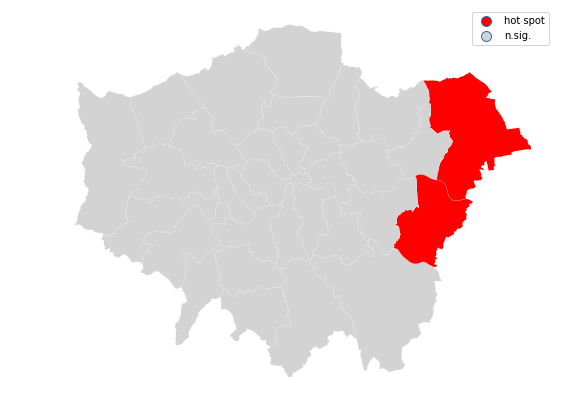

In [604]:
# Plotting the hot spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_oth1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [605]:
# Identifying cold spots
spots_oth2 = ['n.sig.', 'cold spot']
labels_oth2 = [spots_oth2[i] for i in coldspot_oth*1]

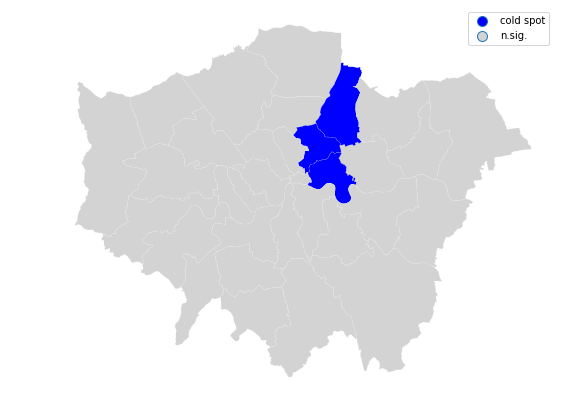

In [606]:
# Plotting the cold spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_oth2).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [607]:
# Identifying the low-high outliers
spots_oth3 = ['n.sig.', 'lowhigh']
labels_oth3 = [spots_oth3[i] for i in lowhigh_oth*1]

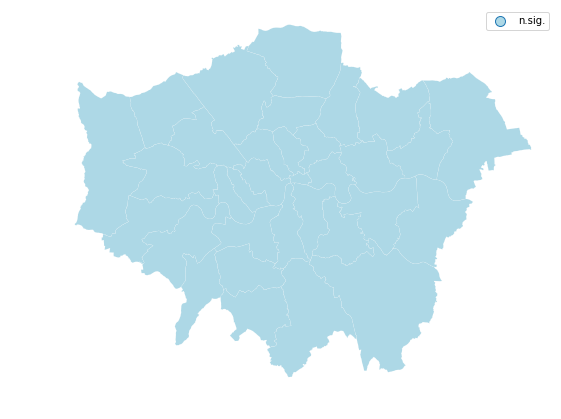

In [608]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_oth3).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [609]:
# Identifying high-low outliers
spots_oth4 = ['n.sig.', 'highlow']
labels_oth4 = [spots_oth4[i] for i in highlow_oth*1]

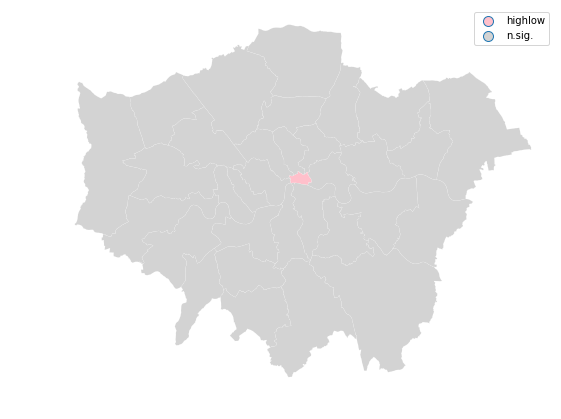

In [610]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_oth4).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [611]:
# Joining all together
sig_oth = 1 * (other_i.p_sim < 0.1)
hotspot_oth = 1 * (sig_oth * other_i.q==1)
coldspot_oth = 3 * (sig_oth * other_i.q==3)
lowhigh_oth = 2 * (sig_oth * other_i.q==2)
highlow_oth = 4 * (sig_oth * other_i.q==4)
spots_oth_1 = hotspot_oth + coldspot_oth + lowhigh_oth + highlow_oth
spots_oth_1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 4, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [612]:
spot_labels_oth1 = [ '0 Not significant', '1 Hot spot', '2 Low-high outlier', '3 Cold spot', '4 High-low outlier']
labels_oth1 = [spot_labels_oth1[i] for i in spots_oth_1]

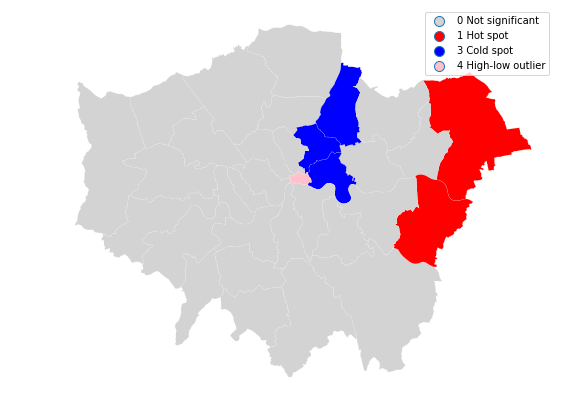

In [614]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue','pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_oth1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

### Total population with reduced mobility

In [615]:
# Setting the spatial lag
lag_tot = lps.weights.lag_spatial(wq, d)

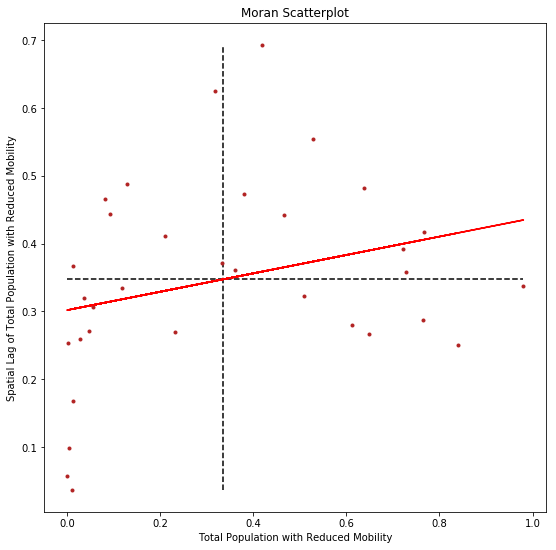

In [618]:
# Looking for Moran's I of population on wheelchair
total = df['Dis_inc0_1']
b, a = np.polyfit(total, lag_tot, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(total, lag_tot, '.', color='firebrick')

 # dashed vert at mean of the population of wheelchair
plt.vlines(total.mean(), lag_tot.min(), lag_tot.max(), linestyle='--')
 # dashed horizontal at mean of lagged population of wheelchair 
plt.hlines(lag_tot.mean(), total.min(), total.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(total, a + b*total, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Total Population with Reduced Mobility')
plt.xlabel('Total Population with Reduced Mobility')
plt.show()

In [619]:
# Calculating Moran's I
total_i = esda.moran.Moran_Local(total, wq)

In [620]:
total_i.q

array([3, 1, 4, 3, 2, 1, 1, 1, 2, 2, 1, 2, 4, 3, 1, 2, 2, 2, 3, 3, 3, 3,
       4, 1, 3, 4, 1, 4, 1, 3, 1, 3, 3])

In [621]:
other_i.q

array([4, 2, 1, 1, 1, 4, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 4, 3, 1,
       4, 4, 1, 4, 4, 3, 1, 3, 4, 3, 2])

In [622]:
# Looking for the number of boroughs having siginificant Moran's I
(total_i.p_sim < 0.1).sum() # for degree of confidence 90% = 7 boroughs
(total_i.p_sim < 0.05).sum() # for degree of confidence 95% = 4 boroughs
(total_i.p_sim < 0.01).sum() # for degree of confidence 99% = 1 boroughs

1

In [623]:
# Labelling the borough based on its position on Moran's I scatter plot
sig_tot = total_i.p_sim < 0.1
hotspot_tot = sig_tot * total_i.q==1
coldspot_tot = sig_tot * total_i.q==3
lowhigh_tot = sig_tot * total_i.q==2
highlow_tot = sig_tot * total_i.q==4

In [624]:
# Identifying hot spots
spots_tot1 = ['n.sig.', 'hot spot']
labels_tot1 = [spots_tot1[i] for i in hotspot_tot*1]

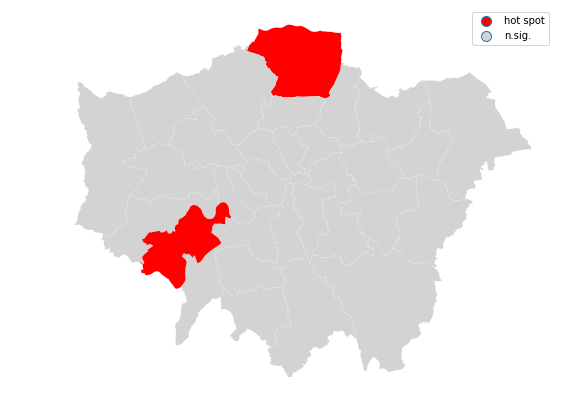

In [625]:
# Plotting the hot spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_tot1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [626]:
# Identifying cold spots
spots_tot2 = ['n.sig.', 'cold spot']
labels_tot2 = [spots_tot2[i] for i in coldspot_tot*1]

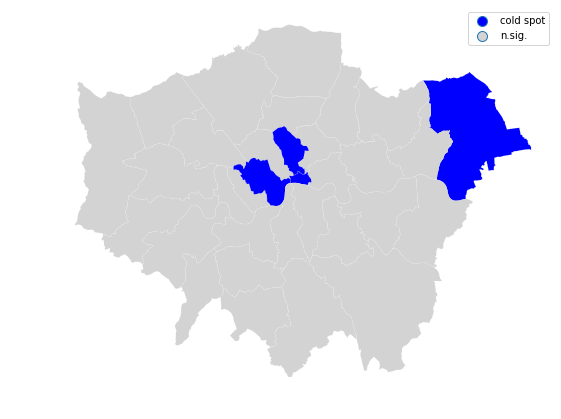

In [627]:
# Plotting the cold spots
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_tot2).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [628]:
# Identifying the low-high outliers
spots_tot3 = ['n.sig.', 'lowhigh']
labels_tot3 = [spots_tot3[i] for i in lowhigh_tot*1]

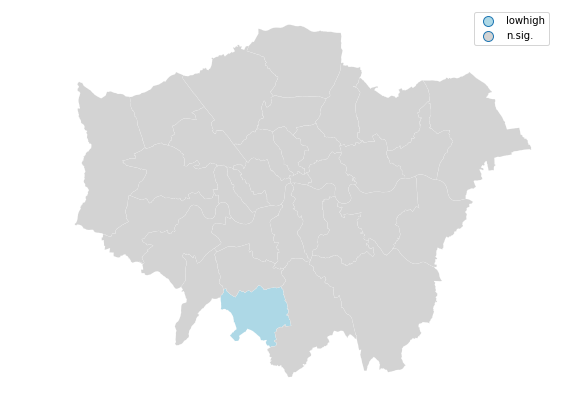

In [629]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_tot3).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [630]:
# Identifying high-low outliers
spots_tot4 = ['n.sig.', 'highlow']
labels_tot4 = [spots_tot4[i] for i in highlow_tot*1]

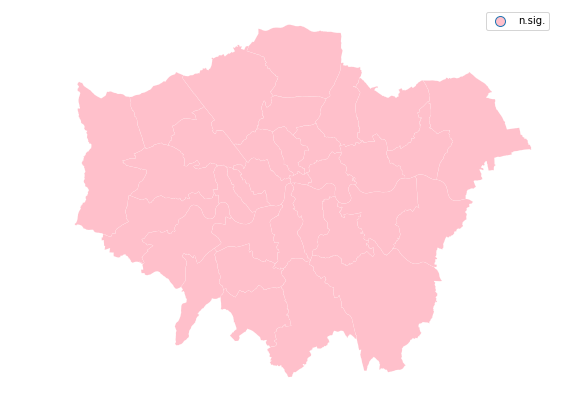

In [631]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_tot4).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [632]:
# Joining all together
sig_tot = 1 * (total_i.p_sim < 0.1)
hotspot_tot = 1 * (sig_tot * total_i.q==1)
coldspot_tot = 3 * (sig_tot * total_i.q==3)
lowhigh_tot = 2 * (sig_tot * total_i.q==2)
highlow_tot = 4 * (sig_tot * total_i.q==4)
spots_tot1 = hotspot_tot + coldspot_tot + lowhigh_tot + highlow_tot
spots_tot1

array([0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0])

In [633]:
spot_labels_tot1 = ['0 Not significant', '1 Hot spot', '2 Low-high outlier', '3 Cold spot', '4 High-low outlier']
labels_tot1_1 = [spot_labels_tot1[i] for i in spots_tot1]

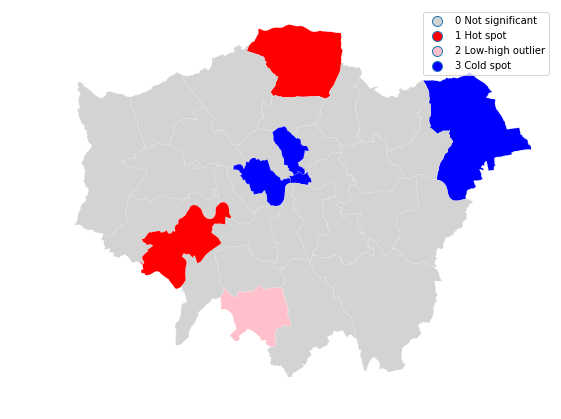

In [634]:
from matplotlib import colors
hmap = colors.ListedColormap(['lightgrey','red', 'lightblue','pink', 'blue' ])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels_tot1_1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()